In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection as cv
import matplotlib.pyplot as plt
    

In [2]:
def univariateFit(x,y):
    num = (x*y).mean() - x.mean()*y.mean()
    den = (x*x).mean() - x.mean()*x.mean()
    m = num/den
    c = y.mean() - m*x.mean()
    return (m,c)

# x = np.array([[0],[1],[2]])
# y = np.array([[1],[2],[3]])
# univariateFit(x,y)

def univariateTest(m,b,xT):
    yT = m*xT + b;
    return yT

def acc(yT,yP):
    num = ((yT-yP)*(yT-yP)).sum()
    den = ((yT-yT.mean())*(yT-yT.mean())).sum()
    score = 1 - num/den
    return score

In [3]:
dataset = pd.read_csv('../data/Salary_Data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values


In [4]:
    X_test, X_train, Y_test, Y_train = cv.train_test_split(X,y,test_size=0.2,random_state=0)
    m,c = univariateFit(X_train,Y_train)
    Y_predicted = univariateTest(m,c,X_test)
    print("Score is = ",acc(Y_test,Y_predicted))


Score is =  -27.3733846939


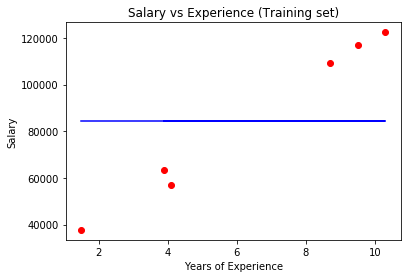

ValueError: x and y must have same first dimension, but have shapes (6, 1) and (24, 1)

In [6]:
# Plotting
# Visualising the Test set results
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, univariateTest(m,c,X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, Y_predicted, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()



